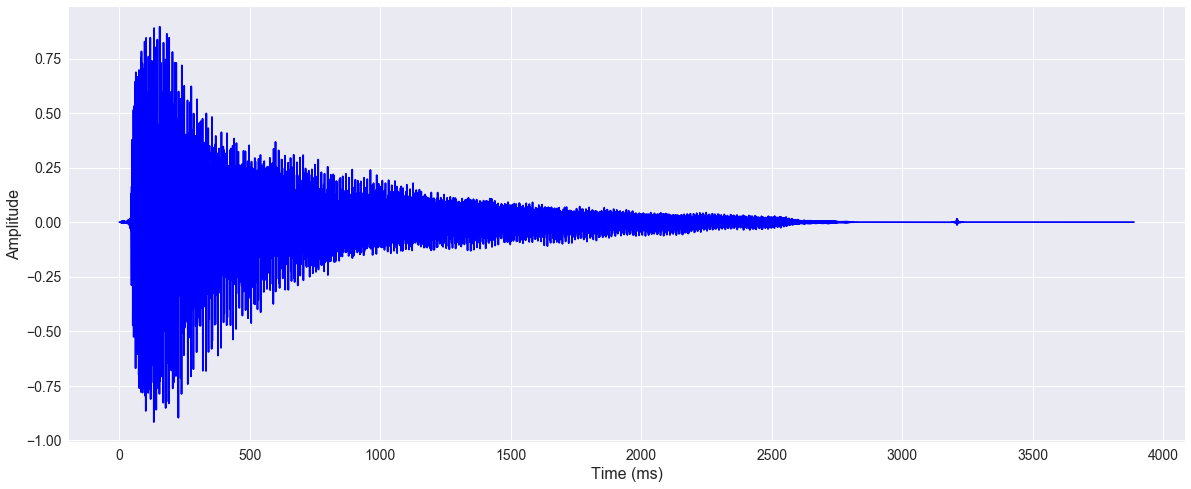

In [2]:
"""
(C) 2018 Nikolay Manchev
This work is licensed under the Creative Commons Attribution 4.0 International
License. To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

fs, snd = wavfile.read("week4output.wav")

snd = snd / (2.**15)
s1 = snd[:,0]

plt.figure(figsize=(20, 8))
plt.style.use("seaborn")

time = np.arange(0, s1.shape[0], 1)
time = (time / fs) * 1000

plt.plot(time, s1, color='b')

plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

[ 325.  326.  327.  328.  329.  330.  331.  332.  333.  400.  401.  402.
  403.  404.  405.  406.  407.  411.  412.  413.  414.  415.  416.  417.
  418.  419.  551.  552.  553.  554.  555.  556.  557.  558.  559.  560.
  561.  562.  563.  564.  565.  658.  659.  660.  661.  830.  831.  832.
  989.  990. 1247. 1248. 1249. 1250. 1322. 1323. 1656.]


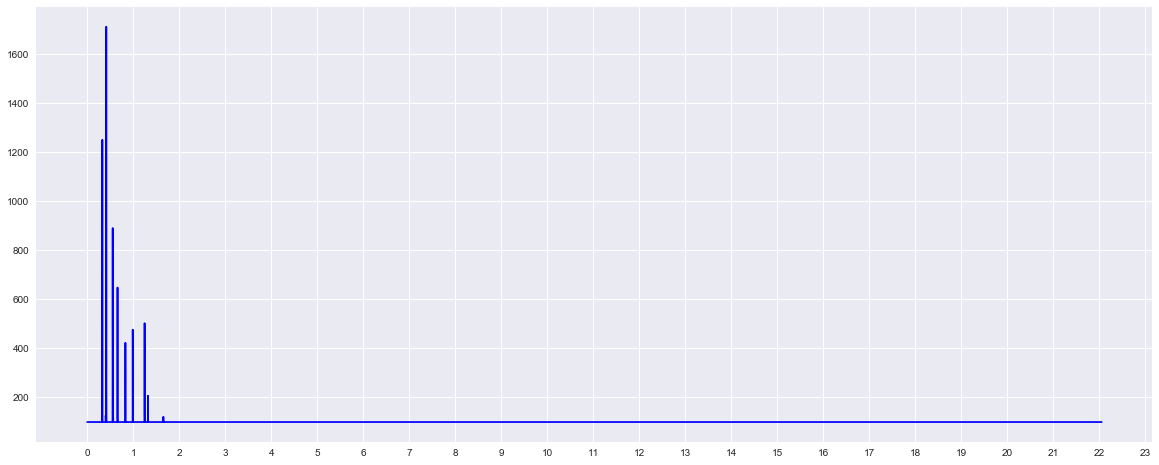

In [8]:
"""
(C) 2018 Nikolay Manchev
This work is licensed under the Creative Commons Attribution 4.0 International
License. To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/.
"""


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile
from numpy.fft import fft

plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.style.use("seaborn")

threshold = 100
fs, snd = wavfile.read("week4output.wav")
y = snd[:,0]

plt.figure(figsize=(20, 8))

n = len(y) 
p = fft(y) 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

freq = np.arange(0, len(mag), 1.0) * (fs / n)

if threshold != 0:
    print(np.unique(np.rint(freq[np.in1d(mag, mag[mag>threshold])])))
    mag[mag<threshold]=threshold

plt.plot(freq/1000, mag, color='b')
plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1.0))

plt.show()

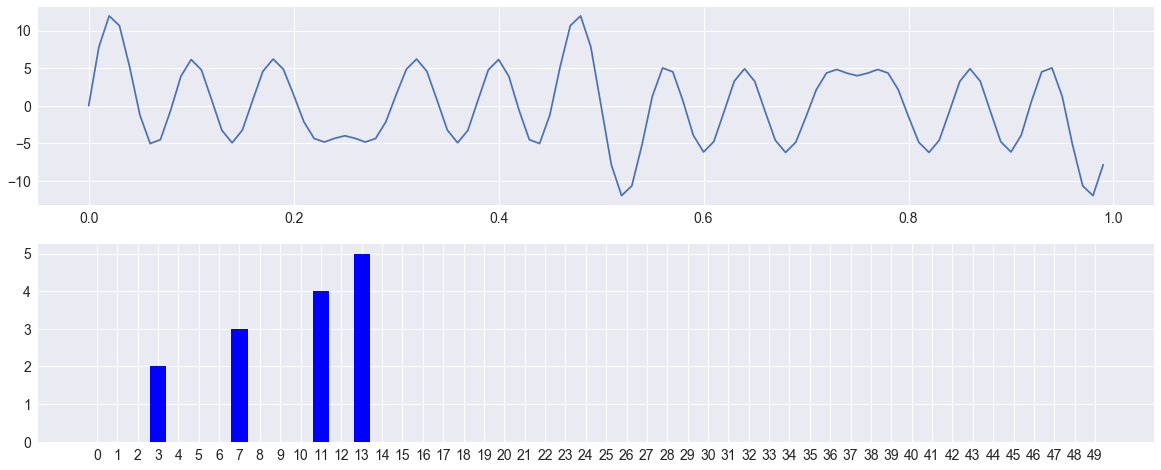

In [30]:
"""
(C) 2018 Nikolay Manchev
This work is licensed under the Creative Commons Attribution 4.0 International
License. To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/.
"""


import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.fft import fft

def gen_wave (freq, amp, T, sr):

    time = np.arange(0,T,1/sr)
    # Wave equation
    X = amp*np.sin(2*np.pi*freq*time)
    
    return time,X

plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
f, axarr = plt.subplots(2, figsize=(20, 8))

#Generate the signals
# sr is the sampling rate. The rate that the signal is recorded by the computer
sr=100 #in Hz
x,y   = gen_wave(3,2,1,sr)
x,y2   = gen_wave(7,3,1,sr)
x,y3   = gen_wave(11,4,1,sr)
x,y4   = gen_wave(13,5,1,sr)

#Combine the signals
#y = y + y2
#y = y + y2 + y3
y = y + y2 + y3 + y4

axarr[0].plot(x, y)

n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)
mag = mag * 2 / n

# Because of the Nyquist limit, It is possible to ignore the right part 
#of the spectogram. The it is divided by 2.
mag = mag[0:math.ceil((n)/2.0)]
x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()